In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,recall_score,precision_score,confusion_matrix

In [37]:
n_y = 1000
y_pred = np.random.rand(n_y)
y_true = np.round(y_pred)


idx_change = np.random.choice(n_y,300,replace=False)
y_true[idx_change] = 1 - y_true[idx_change]

In [38]:
n_p = 100
threshold_vec = np.linspace(0,1,n_p)

tpr = np.zeros(n_p)
fpr = np.zeros(n_p)

for i in range(n_p):
    threshold = threshold_vec[i]
    
    true_positive = np.sum((y_pred > threshold) & (y_true==1.0))
    false_positive = np.sum((y_pred > threshold) & (y_true==0.0))
    false_negative = np.sum((y_pred < threshold) & (y_true==1.0))
    true_negative = np.sum((y_pred < threshold) & (y_true==0.0))

    true_positive_rate = true_positive/(true_positive + false_negative)
    false_positive_rate = false_positive/(false_positive + true_negative)

    tpr[i] = true_positive_rate
    fpr[i] = false_positive_rate
    

In [62]:
fpr_sk,tpr_sk,_ = roc_curve(y_true,y_pred)

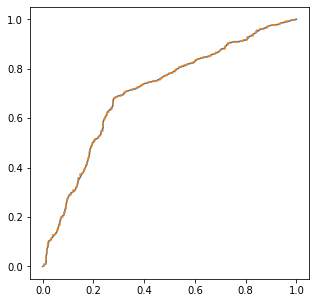

In [65]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.plot(fpr_sk,tpr_sk,'--')
plt.show()

In [40]:
confusion_matrix(np.round(y_pred),y_true)

array([[367, 155],
       [145, 333]])

In [59]:
true_positive = np.sum((y_pred > 0.5) & (y_true==1.0))
false_positive = np.sum((y_pred > 0.5) & (y_true==0.0))
false_negative = np.sum((y_pred < 0.5) & (y_true==1.0))
true_negative = np.sum((y_pred < 0.5) & (y_true==0.0))

#print('{:d}'.format(true_positive))
np.array([[true_negative,false_negative],[false_positive,true_positive]])

array([[367, 155],
       [145, 333]])